In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Implant profile function

In [5]:
def implant_profile(xmin=0,xmax=5,Cp=1.0e17,Rp=0.5):
    x = np.arange(xmin,xmax,0.01)
    net_doping = Cp*np.exp((-(x-Rp)**2)/(2*Rp**2))
    return (net_doping)

### Epi doping function

In [6]:
def epi_doping(baseline=1e16,xmin=0,xmax=5,slope=0.2):
     x = np.arange(xmin,xmax,0.01)
     epi_doping = baseline+slope*x*baseline
     return (epi_doping)

In [7]:
def net_doping(As_doping,B_doping,Phos_doping):
    net_doping = np.abs(As_doping - Boron_doping+Phos_doping)
    return (net_doping)

### Plot function

In [8]:
def plot_doping(net_doping,xmin=0,xmax=5):
    x = np.arange(xmin,xmax,0.01)
    
    plt.figure(figsize=(6,4),dpi=90)
    plt.semilogy(x,net_doping,lw=3,c='k')
    plt.xlim(xmin,xmax*1.1)
    plt.ylim(1.0e14,1e20)
    plt.grid(True)
    plt.xlabel("X-distance ($\mu$m)",fontsize=12)
    plt.ylabel("Net doping ($C/{cm}^3$)",fontsize=12)
    plt.show()

### Plot saving

In [9]:
def plot_saving(net_doping,xmin=0,xmax=5):
    x = np.arange(xmin,xmax,0.01)
    
    plt.figure(figsize=(5,5))
    plt.semilogy(x,net_doping,lw=3,c='k')
    plt.xlim(xmin,xmax*1.1)
    plt.ylim(1.0e14,1e20)

### Doping profile evaluation function

In [10]:
def evaluate_doping(doping):
    from scipy.signal import argrelextrema
    
    l = len(doping)
    src_junction=0
    body_junction=0
    
    a = argrelextrema(doping,np.less) # Returns a Tuple of ndarrays (indices of extrema)
    b=a[0] # Extract the ndarray
    
    if len(b)<2:
        print("No channel found! Source doping too high relative to P-well doping!")
    else:
        x1=b[0]
        x2=b[1]
        src_junction=round((x1*0.01),3)
        body_junction=round((x2*0.01),3)

        if (body_junction-src_junction)<=0.3:
            print(f"Source junction at {src_junction}. P-well junction at {body_junction}. Short channel")
        elif 0.3<(body_junction-src_junction)<=0.6:
            print(f"Source junction at {src_junction}. P-well junction at {body_junction}. Right channel length")
        else:
            print(f"Source junction at {src_junction}. P-well junction at {body_junction}. Long channel")    

### Doping profile labeler function

In [11]:
def label_doping(doping):
    from scipy.signal import argrelextrema
    
    l = len(doping)
    src_junction=0
    body_junction=0
    
    a = argrelextrema(doping,np.less) # Returns a Tuple of ndarrays (indices of extrema)
    b=a[0] # Extract the ndarray
    
    if len(b)<2:
        return ("No channel")
    else:
        x1=b[0]
        x2=b[1]
        src_junction=round((x1*0.01),3)
        body_junction=round((x2*0.01),3)

        if (body_junction-src_junction)<=0.3:
            return ("Short channel")
        elif 0.3<(body_junction-src_junction)<=0.6:
            return ("Optimum channel")
        else:
            return ("Long channel")    

### Doping profile classifier function

In [12]:
def classifier_doping(doping):
    from scipy.signal import argrelextrema
    
    l = len(doping)
    src_junction=0
    body_junction=0
    
    a = argrelextrema(doping,np.less) # Returns a Tuple of ndarrays (indices of extrema)
    b=a[0] # Extract the ndarray
    
    if len(b)<2:
        return (0)
    else:
        x1=b[0]
        x2=b[1]
        src_junction=round((x1*0.01),3)
        body_junction=round((x2*0.01),3)

        if (body_junction-src_junction)<=0.3:
            return (1)
        elif 0.3<(body_junction-src_junction)<=0.6:
            return (2)
        else:
            return (3)

### Implants and epi doping

In [13]:
# Implants and epi doping
As_doping=implant_profile(Cp=5e19,Rp=0.25,xmin=0,xmax=5)
Boron_doping=implant_profile(Cp=4e17,Rp=0.4,xmin=0,xmax=5)
Phos_doping = epi_doping(xmin=0,xmax=5,slope=0.2,baseline=1e16)

# Net doping
Net_doping = np.abs(As_doping - Boron_doping+Phos_doping)

### Plot

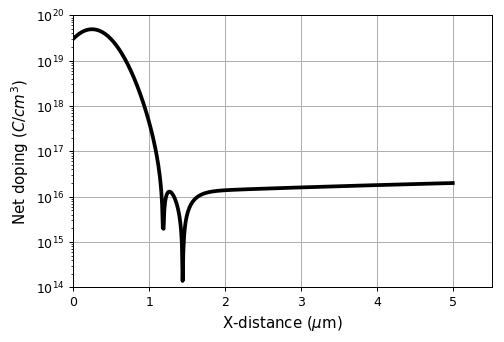

In [14]:
plot_doping(Net_doping,xmin=0,xmax=5)

In [15]:
evaluate_doping(Net_doping)

Source junction at 1.19. P-well junction at 1.44. Short channel


### Random generation of doping profiles

In [80]:
num_samples=500

In [81]:
As_Cp=np.random.random(size=num_samples)*3e19
Boron_Cp=np.random.random(size=num_samples)*4e17
As_Rp=0.1+np.random.random(size=num_samples)*0.2
Boron_Rp=0.15+np.random.random(size=num_samples)*0.25
Phos_baseline=4e16+np.random.random(size=num_samples)*1e16

df = pd.DataFrame([As_Cp,Boron_Cp,As_Rp,Boron_Rp,Phos_baseline])
df=df.transpose()
df.columns=['As_Cp','Boron_Cp','As_Rp','Boron_Rp','Phos_baseline']
df.head(10)

,As_Cp,Boron_Cp,As_Rp,Boron_Rp,Phos_baseline
0,1.395899e+19,2.082950e+17,0.136402,0.268617,4.373595e+16
1,1.364159e+19,1.828547e+15,0.243111,0.205193,4.854297e+16
2,1.548481e+19,2.263478e+17,0.222164,0.351547,4.978666e+16
3,2.676584e+19,3.441659e+17,0.290959,0.281145,4.836617e+16
4,1.408925e+19,1.781958e+17,0.102046,0.272860,4.405467e+16
5,1.905287e+19,7.122593e+16,0.184817,0.339326,4.561532e+16
6,9.244743e+18,2.362370e+17,0.239438,0.261883,4.397476e+16
7,2.519575e+19,3.013780e+17,0.213401,0.154782,4.303301e+16
8,1.431475e+19,5.053879e+16,0.218840,0.155330,4.961149e+16
9,2.154779e+18,2.621109e+17,0.163700,0.208871,4.983698e+16


In [82]:
def channel_labels(a,b,c,d,e):
    x=net_doping(As_doping=implant_profile(Cp=a,Rp=b),
                 B_doping=implant_profile(Cp=c,Rp=d),
                 Phos_doping=epi_doping(baseline=e))
    y=label_doping(x)
    return (y)

In [83]:
def channel_classes(a,b,c,d,e):
    x=net_doping(As_doping=implant_profile(Cp=a,Rp=b),
                 B_doping=implant_profile(Cp=c,Rp=d),
                 Phos_doping=epi_doping(baseline=e))
    y=classifier_doping(x)
    return (y)

In [84]:
channels=[]
for i in range(df.shape[0]):
    channels.append(channel_labels(df.iloc[i]['As_Cp'],df.iloc[i]['As_Rp'],df.iloc[i]['Boron_Cp'],
         df.iloc[i]['Boron_Rp'],df.iloc[i]['Phos_baseline']))

In [85]:
channel_class=[]
for i in range(df.shape[0]):
    channel_class.append(channel_classes(df.iloc[i]['As_Cp'],df.iloc[i]['As_Rp'],df.iloc[i]['Boron_Cp'],
         df.iloc[i]['Boron_Rp'],df.iloc[i]['Phos_baseline']))

In [86]:
df['Channel']=channels
df['Channel_class']=channel_class

In [87]:
def net_profiles(a,b,c,d,e):
    x=net_doping(As_doping=implant_profile(Cp=a,Rp=b),
                 B_doping=implant_profile(Cp=c,Rp=d),
                 Phos_doping=epi_doping(baseline=e))
    return (x)

In [88]:
net_profile=[]
for i in range(df.shape[0]):
    net_profile.append(net_profiles(df.iloc[i]['As_Cp'],df.iloc[i]['As_Rp'],df.iloc[i]['Boron_Cp'],
         df.iloc[i]['Boron_Rp'],df.iloc[i]['Phos_baseline']))

In [89]:
df['Net_dopings']=net_profile

In [90]:
df.head(10)

,As_Cp,Boron_Cp,As_Rp,Boron_Rp,Phos_baseline,Channel,Channel_class,Net_dopings
0,1.395899e+19,2.082950e+17,0.136402,0.268617,4.373595e+16,Long channel,3,"[8.267680138200794e+18, 8.881280391684274e+18,..."
1,1.364159e+19,1.828547e+15,0.243111,0.205193,4.854297e+16,No channel,0,"[8.079974380803838e+18, 8.414153674865833e+18,..."
2,1.548481e+19,2.263478e+17,0.222164,0.351547,4.978666e+16,Short channel,1,"[9.199188535196488e+18, 9.615686731687586e+18,..."
3,2.676584e+19,3.441659e+17,0.290959,0.281145,4.836617e+16,No channel,0,"[1.6040056036103498e+19, 1.659182473789193e+19..."
4,1.408925e+19,1.781958e+17,0.102046,0.272860,4.405467e+16,Long channel,3,"[8.347006541962214e+18, 9.175712594758999e+18,..."
5,1.905287e+19,7.122593e+16,0.184817,0.339326,4.561532e+16,Optimum channel,2,"[1.1359153403657826e+19, 1.1977836915185854e+1..."
6,9.244743e+18,2.362370e+17,0.239438,0.261883,4.397476e+16,Short channel,1,"[5.408582514156641e+18, 5.636651800625133e+18,..."
7,2.519575e+19,3.013780e+17,0.213401,0.154782,4.303301e+16,Short channel,1,"[1.5082413086759107e+19, 1.5792020581521512e+1..."
8,1.431475e+19,5.053879e+16,0.218840,0.155330,4.961149e+16,Short channel,1,"[8.489333310764198e+18, 8.879832423179944e+18,..."
9,2.154779e+18,2.621109e+17,0.163700,0.208871,4.983698e+16,Long channel,3,"[1.1141642958391404e+18, 1.187936733350747e+18..."


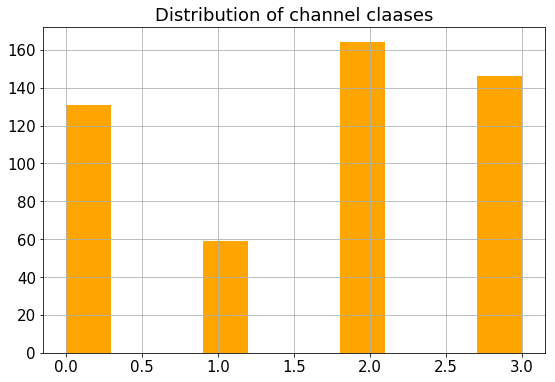

In [98]:
plt.figure(figsize=(9,6))
plt.title("Distribution of channel claases",fontsize=18)
plt.hist(df['Channel_class'],color='orange')
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Save the net doping plots in a directory

In [99]:
from PIL import Image
from tqdm import tqdm

savelocation = 'Saved_Figs/'
for i in tqdm(range(df.shape[0])):
    plot_saving(df.iloc[i]['Net_dopings'])
    plt.savefig(fname=savelocation+'Plot'+str(i),dpi=40,bbox_inches='tight')
    plt.close()
    #img = Image.open(savelocation+'Plot'+str(i)+'.png').convert('LA')
    #img.save(savelocation+'Plot'+str(i)+'.png')

100%|████████████████████████████████████████| 500/500 [04:35<00:00,  1.81it/s]


### Image of a random plot

c:\programdata\miniconda3\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


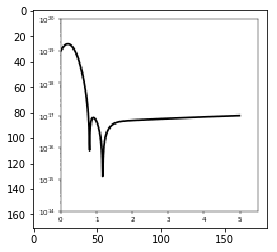

In [100]:
from skimage import io
im0 = io.imread('Saved_Figs/Plot15.png',as_grey=True)
plt_shape=im0.shape
plt.imshow(im0,cmap='gray')
plt.show()

In [101]:
x=plt.imread('Saved_Figs/Plot15.png')

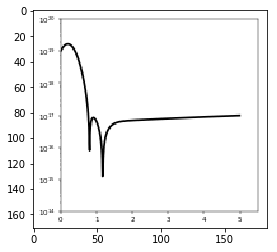

In [102]:
plt.imshow(x)

### Neural Network Model

In [103]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Set up the image data to be used as input to the Neural Network

In [104]:
X =[]
for i in range(df.shape[0]):
    X.append(io.imread(savelocation+'Plot'+str(i)+'.png',as_grey=True).reshape(plt_shape[0],plt_shape[1],1))
    
y=df['Channel_class']
num_classes = 4
y = keras.utils.to_categorical(y, num_classes)

c:\programdata\miniconda3\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


In [105]:
X=np.array(X)

In [106]:
X.shape

(500, 171, 184, 1)

### Training and Test set splits

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

### Set up the Convolutional Neural Network

A convolutional neural network (CNN, or ConvNet) is a class of deep, feed-forward artificial neural networks, most commonly applied to analyzing visual imagery. CNNs use a variation of multilayer perceptrons designed to require minimal preprocessing. A CNN consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of convolutional layers, pooling layers, fully connected layers and normalization layers.

![cnn1](https://cdn-images-1.medium.com/max/1600/1*N4h1SgwbWNmtrRhszM9EJg.png)

In [112]:
input_shape=(plt_shape[0],plt_shape[1],1)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 171, 184, 32)      160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 85, 92, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 85, 92, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 42, 46, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 42, 46, 128)       32896     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 21, 23, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 21, 23, 128)       0         
__________

### Optimizer and loss function

In [114]:
optimizer=keras.optimizers.adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [115]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=20,
          validation_data=(X_val, y_val), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 300 samples, validate on 100 samples
Epoch 1/20
300/300 [==============================] - ETA: 22s - loss: 1.3417 - acc: 0.43 - ETA: 16s - loss: 3.7309 - acc: 0.35 - ETA: 12s - loss: 3.4156 - acc: 0.32 - ETA: 10s - loss: 3.1226 - acc: 0.29 - ETA: 7s - loss: 2.8225 - acc: 0.2938 - ETA: 6s - loss: 2.5939 - acc: 0.286 - ETA: 4s - loss: 2.4213 - acc: 0.303 - ETA: 2s - loss: 2.2915 - acc: 0.308 - ETA: 0s - loss: 2.1915 - acc: 0.316 - 18s 59ms/step - loss: 2.1579 - acc: 0.3200 - val_loss: 1.3507 - val_acc: 0.3400
Epoch 2/20
300/300 [==============================] - ETA: 13s - loss: 1.3639 - acc: 0.31 - ETA: 11s - loss: 1.3657 - acc: 0.28 - ETA: 10s - loss: 1.3475 - acc: 0.33 - ETA: 8s - loss: 1.3485 - acc: 0.3125 - ETA: 7s - loss: 1.3554 - acc: 0.318 - ETA: 5s - loss: 1.3470 - acc: 0.307 - ETA: 3s - loss: 1.3428 - acc: 0.294 - ETA: 2s - loss: 1.3329 - acc: 0.300 - ETA: 0s - loss: 1.3402 - acc: 0.312 - 16s 55ms/step - loss: 1.3385 - acc: 0.3100 - val_loss: 1.2919 - val_acc: 0.3400


300/300 [==============================] - ETA: 13s - loss: 0.0962 - acc: 0.96 - ETA: 11s - loss: 0.0731 - acc: 0.98 - ETA: 10s - loss: 0.0694 - acc: 0.97 - ETA: 8s - loss: 0.0583 - acc: 0.9844 - ETA: 7s - loss: 0.0510 - acc: 0.987 - ETA: 5s - loss: 0.0691 - acc: 0.974 - ETA: 3s - loss: 0.0630 - acc: 0.977 - ETA: 2s - loss: 0.0657 - acc: 0.976 - ETA: 0s - loss: 0.0749 - acc: 0.972 - 17s 56ms/step - loss: 0.0750 - acc: 0.9733 - val_loss: 0.1553 - val_acc: 0.9500
Epoch 19/20
300/300 [==============================] - ETA: 13s - loss: 0.0659 - acc: 0.96 - ETA: 11s - loss: 0.0352 - acc: 0.98 - ETA: 10s - loss: 0.0406 - acc: 0.97 - ETA: 8s - loss: 0.0501 - acc: 0.9766 - ETA: 7s - loss: 0.0582 - acc: 0.968 - ETA: 5s - loss: 0.0494 - acc: 0.974 - ETA: 3s - loss: 0.0502 - acc: 0.973 - ETA: 2s - loss: 0.0498 - acc: 0.972 - ETA: 0s - loss: 0.0487 - acc: 0.975 - 16s 55ms/step - loss: 0.0490 - acc: 0.9767 - val_loss: 0.1558 - val_acc: 0.9500
Epoch 20/20
300/300 [==============================] - E

In [116]:
model.load_weights('model.weights.best.hdf5')
model.evaluate(X_test,y_test)

100/100 [==============================] - ETA:  - ETA:  - ETA:  - 1s 14ms/step


[0.13435203433036805, 0.97]

In [117]:
predictions=model.predict(X_test)

### Show time! Test a prediction!

In [119]:
test_prediction=15

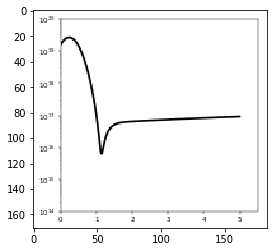

In [121]:
plt.imshow(X_test[test_prediction].reshape(X_test.shape[1],X_test.shape[2]),cmap='gray')
plt.show()

#### What the Neural Network outputs in probabilities

In [122]:
predictions[test_prediction]

array([9.97623980e-01, 1.41089119e-03, 8.43886461e-04, 1.21128214e-04],
      dtype=float32)

#### What the actual class is

In [123]:
y_test[test_prediction]

array([1., 0., 0., 0.], dtype=float32)

### Visually show the Neural Network output

c:\programdata\miniconda3\lib\site-packages\matplotlib\pyplot.py:2790: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


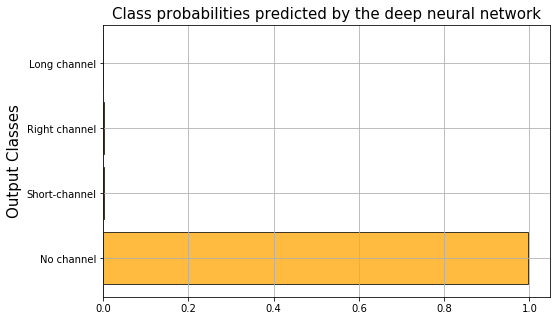

In [124]:
plt.figure(figsize=(8,5))
plt.barh(width=predictions[test_prediction],bottom=[1,2,3,4],edgecolor='k',color='orange',alpha=0.75,
         tick_label=['No channel','Short-channel','Right channel','Long channel'])
plt.grid(True)
plt.ylabel("Output Classes",fontsize=15)
plt.title("Class probabilities predicted by the deep neural network",fontsize=15)
plt.show()

### Table of predicted and actual class labels

In [127]:
df_preds1=pd.DataFrame(predictions,columns=['Predicted Class-'+str(i) for i in range(1,5)])
df_preds2=pd.DataFrame(y_test,columns=['Actual Class-'+str(i) for i in range(1,5)])
df_preds=pd.concat([df_preds1,df_preds2],axis=1)
df_preds.head(20)

,Predicted Class-1,Predicted Class-2,Predicted Class-3,Predicted Class-4,Actual Class-1,Actual Class-2,Actual Class-3,Actual Class-4
0,9.999956e-01,8.280964e-08,0.000003,0.000001,1.0,0.0,0.0,0.0
1,2.103031e-01,7.427968e-01,0.045950,0.000950,0.0,1.0,0.0,0.0
2,9.966379e-01,1.832807e-03,0.001236,0.000293,1.0,0.0,0.0,0.0
3,4.032896e-05,1.303050e-03,0.977186,0.021470,0.0,0.0,1.0,0.0
4,9.124783e-01,7.830039e-02,0.008431,0.000790,1.0,0.0,0.0,0.0
5,1.989815e-06,7.792508e-04,0.998602,0.000617,0.0,0.0,1.0,0.0
6,7.077238e-04,5.171399e-07,0.000352,0.998940,0.0,0.0,0.0,1.0
7,5.755540e-05,1.867714e-08,0.000088,0.999855,0.0,0.0,0.0,1.0
8,5.606919e-07,1.218205e-03,0.998182,0.000599,0.0,0.0,1.0,0.0
9,9.272489e-06,3.718417e-04,0.955045,0.044574,0.0,0.0,1.0,0.0


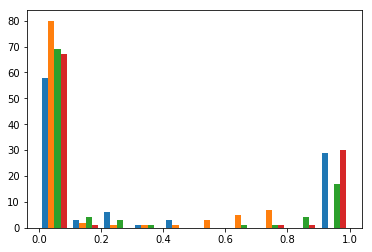

In [126]:
plt.hist(predictions)
plt.show()

### Another one!

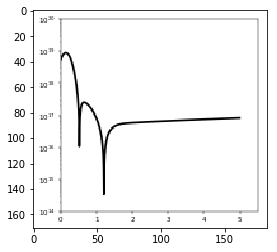

In [130]:
test_prediction=90
plt.imshow(X_test[test_prediction].reshape(X_test.shape[1],X_test.shape[2]),cmap='gray')
plt.show()

In [131]:
predictions[test_prediction]

array([1.1651203e-04, 1.9876022e-07, 3.9340550e-04, 9.9948990e-01],
      dtype=float32)

In [132]:
y_test[test_prediction]

array([0., 0., 0., 1.], dtype=float32)

c:\programdata\miniconda3\lib\site-packages\matplotlib\pyplot.py:2790: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


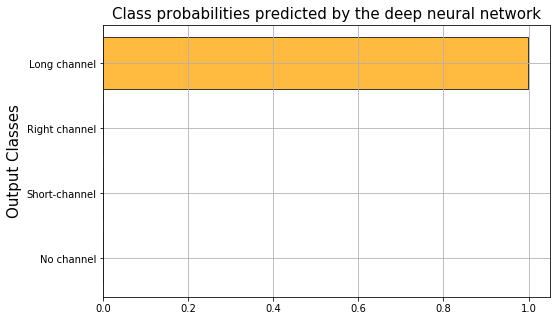

In [133]:
plt.figure(figsize=(8,5))
plt.barh(width=predictions[test_prediction],bottom=[1,2,3,4],edgecolor='k',color='orange',alpha=0.75,
         tick_label=['No channel','Short-channel','Right channel','Long channel'])
plt.grid(True)
plt.ylabel("Output Classes",fontsize=15)
plt.title("Class probabilities predicted by the deep neural network",fontsize=15)
plt.show()